In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
respondents = pd.read_csv("atusdata/atusresp_2013.dat")
activities = pd.read_csv("atusdata/atusact_2013.dat")
info = pd.read_csv("atusdata/atuscps_2013.dat")

In [ ]:
info.head()

In [ ]:
not_married.head()

In [3]:
adults_crit = summary.TEAGE >= 18
child_crit = summary.TEAGE < 18
no_children_crit = summary.TRCHILDNUM == 0
male_crit = summary.TESEX == 1
female_crit = summary.TESEX == 2
not_married_crit = info.PEMARITL == 6

In [4]:
not_married = info[not_married_crit]

In [5]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [6]:
adults = summary[adults_crit & no_children_crit]


In [7]:
adults_not_married = pd.merge(adults, not_married, how="inner", left_on="tucaseid", right_on="TUCASEID")

In [ ]:
adults_not_married.head()

In [8]:
data_adults_grooming = adults_not_married[['TUFINLWGT', 'TESEX', 't010201']]

In [9]:
data_adults_grooming_m = data_adults_grooming[male_crit]
data_adults_grooming_f = data_adults_grooming[female_crit]
male_groom_hours = average_minutes(data_adults_grooming_m, "010201") / 60
female_groom_hours = average_minutes(data_adults_grooming_f, "010201") / 60

/Users/ZSeaborn/Desktop/Homework/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [10]:
print(male_groom_hours)
print(female_groom_hours)

0.684157975769
0.70268052933


In [11]:
data_intimate = adults_not_married[['TUFINLWGT', 'TESEX', 't010401']]
male_intimate = data_intimate[male_crit]
female_intimate = data_intimate[female_crit]
male_intimate_hours = average_minutes(male_intimate, '010401') /60
female_intimate_hours = average_minutes(female_intimate, '010401') /60

/Users/ZSeaborn/Desktop/Homework/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [12]:
data_phone = adults_not_married[['TUFINLWGT', 'TESEX', 't160102']]
male_phone = data_phone[male_crit]
female_phone = data_phone[female_crit]
male_phone_hours = average_minutes(male_phone, '160102') / 60
female_phone_hours = average_minutes(female_phone, '160102') / 60

/Users/ZSeaborn/Desktop/Homework/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [13]:
data_work = adults_not_married[['TUFINLWGT', 'TESEX', 't050101', 't050102', 't050401', 't050202']]
male_work = data_work[male_crit]
female_work = data_work[female_crit]
male_main_work_hours = average_minutes(male_work, '050101') / 60
male_second_work_hours = average_minutes(male_work, '050102') / 60 
female_main_work_hours = average_minutes(female_work, '050101') / 60
female_second_work_hours = average_minutes(female_work, '050102') / 60
male_work_job_search = average_minutes(male_work, '050401') / 60
male_work_food = average_minutes(male_work, '050202') / 60
female_work_job_search = average_minutes(female_work, '050401') / 60
female_work_food = average_minutes(female_work, '050202') / 60

/Users/ZSeaborn/Desktop/Homework/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [15]:
male_female_generic = {"Male": {"Grooming": male_groom_hours, "'Intimate'": male_intimate_hours, "Time on Phone": male_phone_hours}, "Female": {"Grooming": female_groom_hours, "'Intimate'": female_intimate_hours, "Time on Phone": female_phone_hours}}
male_vs_female_generic = pd.DataFrame.from_dict(male_female_generic)

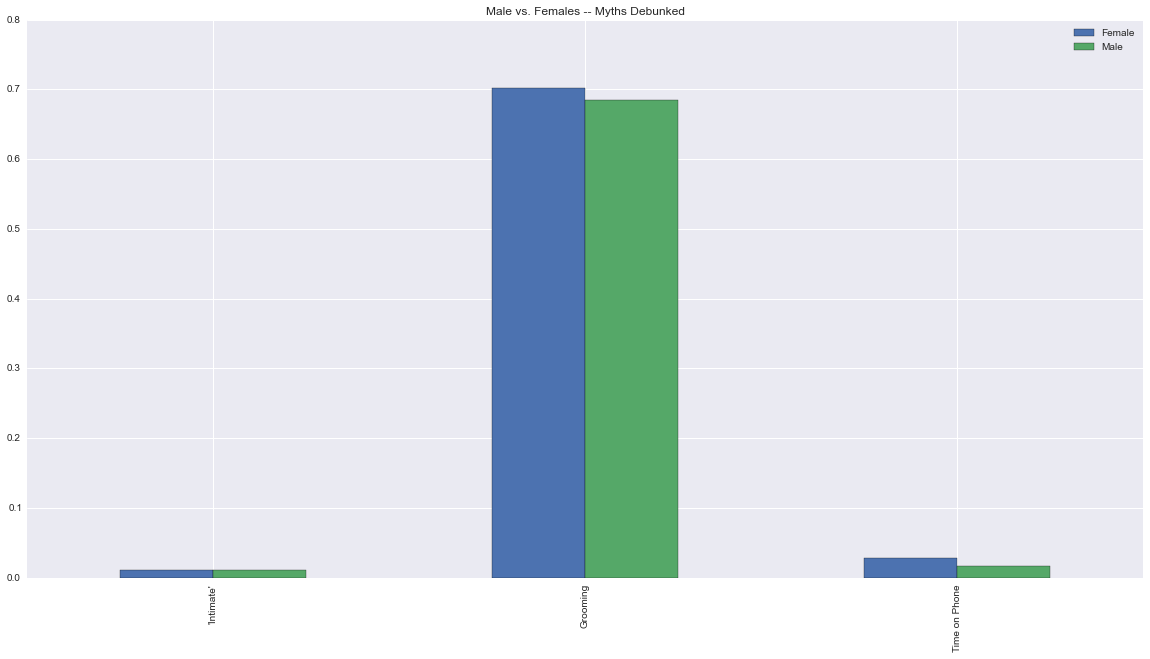

In [16]:
male_vs_female_generic.plot(kind="bar", title="Male vs. Females -- Myths Debunked", figsize=(20,10))

In [17]:
male_female_work = {"Male": {"Main Job": male_main_work_hours, "Second Job": male_second_work_hours, "Job Searching": male_work_job_search, "Eating": male_work_food}, "Female": {"Main Job": female_main_work_hours, "Second Job": female_second_work_hours, "Job Searching": female_work_job_search, "Eating": female_work_food}}
male_vs_female_work = pd.DataFrame.from_dict(male_female_work)

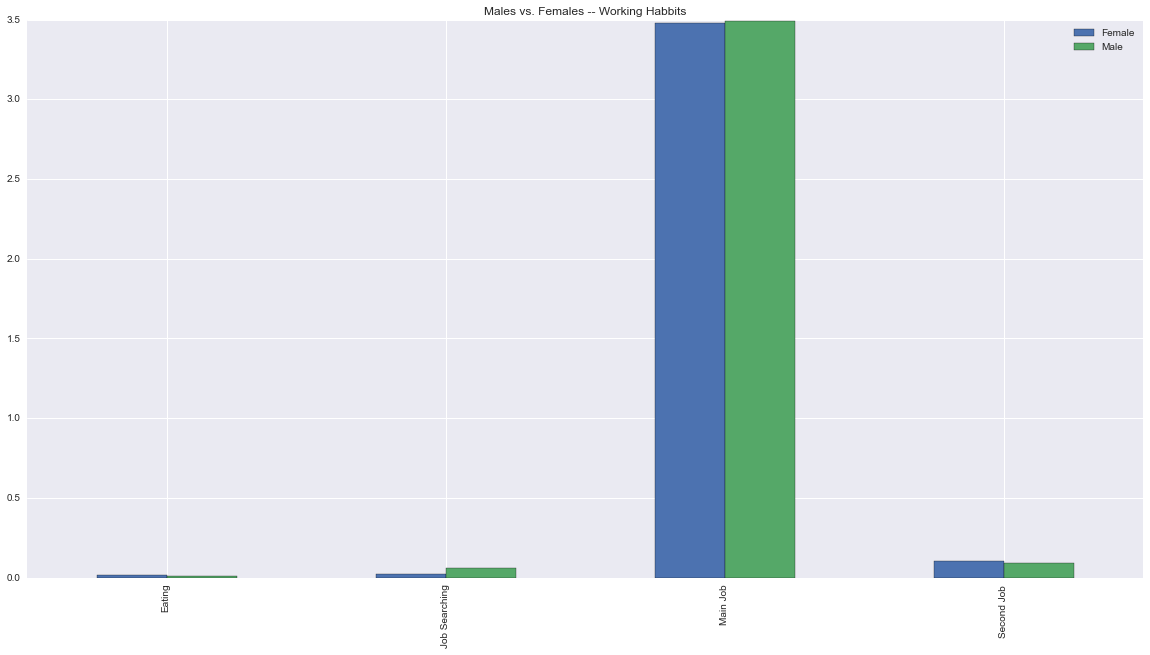

In [18]:
male_vs_female_work.plot(kind="bar", title="Males vs. Females -- Working Habbits", figsize = (20, 10))

In [19]:
male_vs_female_work

,Female,Male
Eating,0.019012,0.010737
Job Searching,0.024057,0.058875
Main Job,3.479282,3.492220
Second Job,0.104051,0.093654
